In [102]:
#some necessary imports for the assignment 
import numpy as np
import cv2
import matplotlib.pyplot as plt




(-0.5, 169.5, 199.5, -0.5)

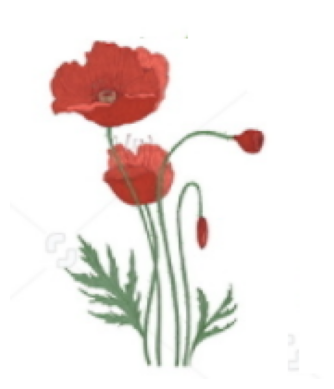

In [119]:
original_img=cv2.imread("C://Users/DELL/Downloads/flowers.png")

rgb_img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.axis(False)

template=cv2.imread("C://Users/DELL/Downloads/flowers_template.png")

template=cv2.cvtColor(template,cv2.COLOR_BGR2RGB)

plt.imshow(template)
plt.axis(False)



In [120]:
#checking image and template shapes

print(f"shape of the original image :{rgb_img.shape}")
print(f"shape of the template image: {template.shape}")

display(rgb_img.shape[1]/template.shape[1])## ill round it up when it comes to doing template matching if necessary 

display(rgb_img.shape[0]/template.shape[0]) #same situation for rows




shape of the original image :(614, 1121, 3)
shape of the template image: (200, 170, 3)


6.594117647058823

3.07

(-0.5, 1120.5, 613.5, -0.5)

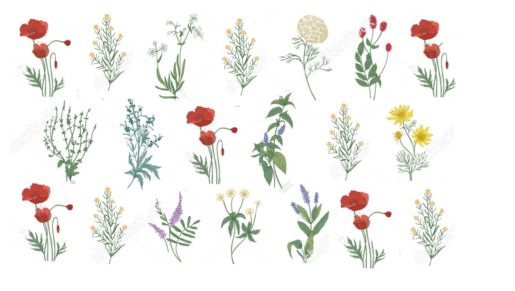

In [121]:
plt.imshow(rgb_img)
plt.axis(False)

In [122]:
result=cv2.matchTemplate(rgb_img,template,cv2.TM_CCOEFF_NORMED) # will use this for both simple template matching and nms algorithm
img_copy=rgb_img.copy() #made a copy to keep the original image , incase i want to do any permanenet altercations on it


height,width,_=template.shape



thresh=0.7 # how we determine to keep which candid matches


(ys, xs) =np.where(result>=thresh)



(-0.5, 1120.5, 613.5, -0.5)

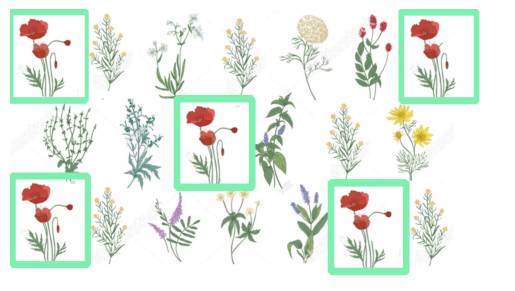

In [123]:




for(x, y) in zip(xs, ys):
    cv2.rectangle(img_copy,(x,y),(x+width,y+height),(125,240,175),2)



plt.imshow(img_copy)
plt.axis(False)

In [124]:

 
def compute_iou(box1,box2):
    '''this function is used to compute the total intersection/ union area given that union is not 0 
            otherwise it returns 0 if the union is 0'''

    x1_b1,y1_b1,x2_b1,y2_b1=box1

    x1_b2,y1_b2,x2_b2,y2_b2=box2

    x_intersect_max=max(x1_b1,x1_b2)
    x_intersect_min=min(x2_b1,x2_b2)
    y_intersect_max=max(y1_b1,y1_b2)
    y_intersect_min=min(y2_b1,y2_b2)

    intersection=max(0,x_intersect_min-x_intersect_max) * max(0,y_intersect_min-y_intersect_max)

    box1_area = (x2_b1 - x1_b1) * (y2_b1 - y1_b1)
    box2_area = (x2_b2 - x1_b2) * (y2_b2 - y1_b2)
    union = box1_area + box2_area - intersection

    return intersection/union if union> 0 else 0



def nms(boxes,scores, iou_thresh=0.4):
    '''this function removes all unncessary bounding boxes based on a inersection threshold.'''

    srted_scores=np.argsort(scores)[::-1]

    best=[]


    while len(srted_scores)>0:
        #append the current best possible box to the candidates
        curr=srted_scores[0]
        best.append(curr)

        remaining=srted_scores[1:]
        filtered=[]

        for box in remaining: 
            # go all over the remmaining boes and removing all those with overlapping majority with the current best

            if compute_iou(boxes[curr],boxes[box]) < iou_thresh:
                filtered.append(box)
        

        srted_scores=np.array(filtered)
    

    return [boxes[i] for i in best]










In [125]:
boxes = [(x, y, x + width, y + height) for x, y in zip(xs, ys)]
scores = [result[y, x] for y, x in zip(ys, xs)] 


filtered = nms(boxes,scores,0.6)




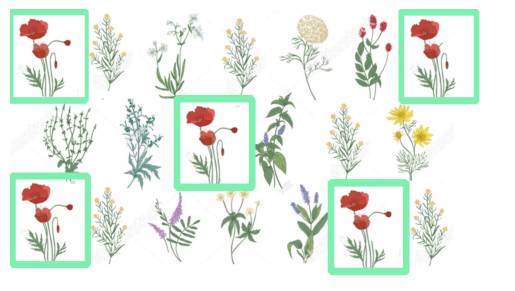

In [128]:
for (x1, y1, x2, y2) in filtered:
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (125, 240, 175), 1)


plt.imshow(img_copy)
plt.axis("off")
plt.show()

In [127]:
print(f" the number of boxes before nms:{len(xs)}")

print(f" number of boxes after nms: {len(filtered)}")

 the number of boxes before nms:480
 number of boxes after nms: 5
